In [1]:
# Required Lib

"""
PyWavelets==0.5.2
opencv-python==3.4.3.18
seaborn==0.8.1
"""

'\nPyWavelets==0.5.2\nopencv-python==3.4.3.18\nseaborn==0.8.1\n'

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#read in sample image in RBG and Gray
img = cv2.imread(r'C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Image classification project\model\datasets\serena williams\208ccd6a50433afc0f9e828f6ab4cc38.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
img.shape

(941, 650, 3)

In [7]:
gray.shape

(941, 650)

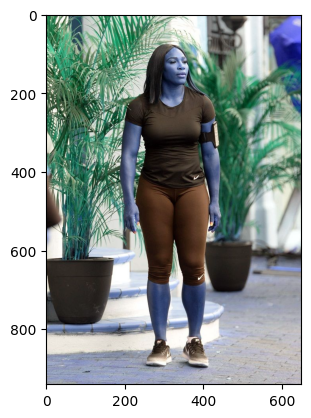

In [6]:
plt.imshow(img)

In [7]:
gray

array([[ 90,  92,  99, ..., 170, 171, 171],
       [ 96,  95,  99, ..., 170, 172, 172],
       [101,  96,  96, ..., 170, 172, 172],
       ...,
       [159, 163, 166, ..., 170, 164, 176],
       [146, 146, 156, ..., 177, 181, 189],
       [175, 167, 169, ..., 189, 167, 166]], dtype=uint8)

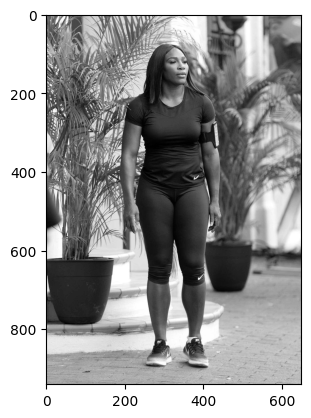

In [8]:
plt.imshow(gray, cmap='gray')

Face Detection Using Haar Cascades
Goto opencv documentation for the systax (https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)

Here we will deal with detection. OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. 
Those XML files are stored in opencv/data/haarcascades/ folder. Let’s create face and eye detector with OpenCV.

First we need to load the required XML classifiers, before this, download the xml classifier file fron opencv github. Then load our input image (or video) in grayscale mode.



In [8]:

face_cascade = cv2.CascadeClassifier(r'C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Image classification project\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade =  cv2.CascadeClassifier(r'C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Image classification project\model\opencv\haarcascades\haarcascade_eye.xml')

In [10]:
# this extract the location of the face
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[298,  88,  82,  82]])

In [11]:
# setting the rectacgle points of the face to x,y,w,h
(x,y,w,h) = faces[0]
x,y,w,h

(298, 88, 82, 82)

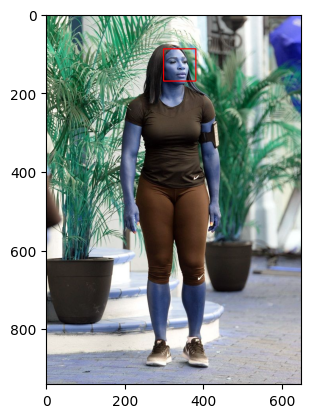

In [13]:
# This detect only the face using face cascade default
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

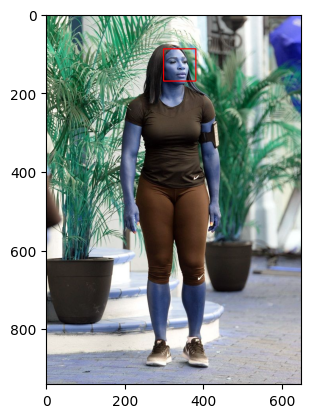

In [14]:
# this capture both the face and the eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()



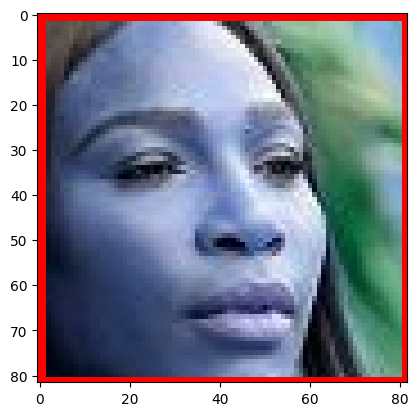

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

We are repeating the detection for all the images and save the cropped detected faces.
By writing a function that take in image path and give out crop face only if the eyes count = 2

In [28]:
def extract_cropped_images_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

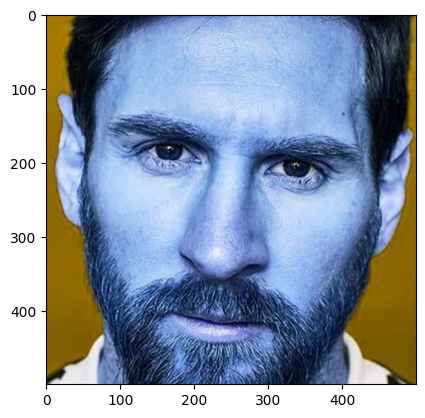

In [29]:
# Here, we tried the function with a smaple image
cropped_img = extract_cropped_images_2_eyes(r'C:\Users\USER-PC\OneDrive\Data Analytics\Data Science_Machine Learning\Image classification project\model\datasets\messi\a8784d8ea286c3fbfef21201af1c1254.jpg')
plt.imshow(cropped_img)

You can test the function with images that have only one eye visible, if the func is working well, the output will be null

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil

In [18]:
path_to_data = os.path.join('model', 'datasets')
path_to_cropped_data = os.path.join('model', 'datasets', 'cropped')

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [32]:
img_dirs

['model\\datasets\\cropped',
 'model\\datasets\\mbappe',
 'model\\datasets\\messi',
 'model\\datasets\\osimhen',
 'model\\datasets\\ronaldo',
 'model\\datasets\\serena williams']

##### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [24]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil


path_to_data = os.path.join('model', 'datasets')
path_to_cropped_data = os.path.join('model', 'datasets', 'cropped')

# Use os.path.join for creating cross-platform paths
face_cascade = cv2.CascadeClassifier(os.path.join('model', 'opencv', 'haarcascades', 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join('model', 'opencv', 'haarcascades', 'haarcascade_eye.xml'))

def extract_cropped_images_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not loaded properly: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color



img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = extract_cropped_images_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cropped_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)
                
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  # Fixed the increment operation


cropped
mbappe
Generating cropped images in folder: model\datasets\cropped\mbappe
Image not loaded properly: model\datasets\mbappe\09410000-0a00-0242-156c-08dae1c5f1d9_w1080_h608_s.jpg
Image not loaded properly: model\datasets\mbappe\c_url=https%3A%2F%2Fimages.teamtalk.com%2Fcontent%2Fuploads%2F2023%2F11%2F28222923%2FKylian-Mbappe-celebrating-a-goal-for-PSG-against-Newcastle-United.jpg
Image not loaded properly: model\datasets\mbappe\c_url=https%3A%2F%2Fimages.teamtalk.com%2Fcontent%2Fuploads%2F2024%2F01%2F15114624%2FTT-Two-Badges-Dark-Mbappe-with-Liverpool-amp-Real-Madrid-1.jpg
messi
Generating cropped images in folder: model\datasets\cropped\messi
osimhen
Generating cropped images in folder: model\datasets\cropped\osimhen
Image not loaded properly: model\datasets\osimhen\78366887-0-image-a-5_1701254034349.jpg
Image not loaded properly: model\datasets\osimhen\80109629-12971467-image-a-16_1705449920553.jpg
Image not loaded properly: model\datasets\osimhen\com_lookaside_crawler_media_.j

Well commented code below, whats next is to do manual data cleaning. By deleting any wrong or incorrect in each celeb. Then we do wavelength transformation.

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import cv2  # For image processing
import matplotlib.pyplot as plt  # For plotting and visualization
import os  # For interacting with the operating system
import shutil  # For high-level file operations

# Define paths to the face and eye cascade models using cross-platform compatible paths
face_cascade = cv2.CascadeClassifier(os.path.join('model', 'opencv', 'haarcascades', 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join('model', 'opencv', 'haarcascades', 'haarcascade_eye.xml'))

# Function to extract cropped images with 2 eyes detected
def extract_cropped_images_2_eyes(image_path):
    img = cv2.imread(image_path)  # Read the image from the given path
    if img is None:  # Check if the image was loaded properly
        print(f"Image not loaded properly: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale for detection
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # Detect faces in the image
    for (x, y, w, h) in faces:  # Iterate through each face detected
        roi_gray = gray[y:y+h, x:x+w]  # Extract the region of interest in grayscale for eye detection
        roi_color = img[y:y+h, x:x+w]  # Extract the region of interest in color for cropping
        eyes = eye_cascade.detectMultiScale(roi_gray)  # Detect eyes within the face region
        if len(eyes) >= 2:  # If at least 2 eyes are detected
            return roi_color  # Return the colored region of interest

# Define paths for data storage and processing
path_to_data = os.path.join('model', 'datasets')
path_to_cropped_data = os.path.join('model', 'datasets', 'cropped')

# Collect directories of images
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

# If the directory for cropped images exists, remove it and create a new one
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

# Initialize containers for processed data
cropped_image_dirs = []
celebrity_file_names_dict = {}

# Process each image directory
for img_dir in img_dirs:
    count = 1  # Initialize counter for naming cropped images
    celebrity_name = os.path.basename(img_dir)  # Extract celebrity name from the directory name
    print(celebrity_name)  # Print the celebrity name being processed
    
    celebrity_file_names_dict[celebrity_name] = []  # Initialize an entry in the dictionary for the celebrity
    
    # Process each image in the directory
    for entry in os.scandir(img_dir):
        roi_color = extract_cropped_images_2_eyes(entry.path)  # Extract the cropped image with 2 eyes
        if roi_color is not None:  # If a cropped image is returned
            cropped_folder = os.path.join(path_to_cropped_data, celebrity_name)  # Define the path for storing cropped images
            if not os.path.exists(cropped_folder):  # If the directory does not exist
                os.makedirs(cropped_folder)  # Create the directory
                cropped_image_dirs.append(cropped_folder)  # Add the directory to the list of cropped image directories
                print('Generating cropped images in folder:', cropped_folder)  # Print a message indicating the creation of the folder
                
            cropped_file_name = f"{celebrity_name}{count}.png"  # Define the file name for the cropped image
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)  # Define the full path for the cropped image
            
            cv2.imwrite(cropped_file_path, roi_color)  # Save the cropped image to the specified path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)  # Add the path to the dictionary
            count += 1  # Increment the counter for the next image


In [33]:
img_dir.split('\\')[-1]

'serena williams'

In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'mbappe': ['model\\datasets\\cropped\\mbappe\\mbappe1.png',
  'model\\datasets\\cropped\\mbappe\\mbappe10.png',
  'model\\datasets\\cropped\\mbappe\\mbappe11.png',
  'model\\datasets\\cropped\\mbappe\\mbappe12.png',
  'model\\datasets\\cropped\\mbappe\\mbappe13.png',
  'model\\datasets\\cropped\\mbappe\\mbappe14.png',
  'model\\datasets\\cropped\\mbappe\\mbappe15.png',
  'model\\datasets\\cropped\\mbappe\\mbappe16.png',
  'model\\datasets\\cropped\\mbappe\\mbappe17.png',
  'model\\datasets\\cropped\\mbappe\\mbappe18.png',
  'model\\datasets\\cropped\\mbappe\\mbappe19.png',
  'model\\datasets\\cropped\\mbappe\\mbappe2.png',
  'model\\datasets\\cropped\\mbappe\\mbappe20.png',
  'model\\datasets\\cropped\\mbappe\\mbappe21.png',
  'model\\datasets\\cropped\\mbappe\\mbappe22.png',
  'model\\datasets\\cropped\\mbappe\\mbappe23.png',
  'model\\datasets\\cropped\\mbappe\\mbappe24.png',
  'model\\datasets\\cropped\\mbappe\\mbappe25.png',
  'model\\datasets\\cropped\\mbappe\\mbappe26.png',
  'm

Now we have clean dataset.

Feature Engineering and Image Classification.
Feature Engineering using a technique called wavelength transformation that can be used to extract facial features such as eyes, nose, mouth, lips etc.
Then we will have X & y datasets ready to use in training in model.

Wavelength Transformation: help you to extract the important features from youe image.

In [12]:
import cv2
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    # Convert the input image to grayscale
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # Convert the image data type to float32 and normalize pixel values
    imArray = np.float32(imArray)
    imArray /= 225
    
    # Perform 2D wavelet decomposition on the image
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Modify the wavelet coefficients by zeroing out the approximation coefficients at level 1
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # Reconstruct the image using the modified coefficients
    imArray_H = pywt.waverec2(coeffs_H, mode)
    
    # Denormalize the pixel values of the reconstructed image
    imArray_H *= 255
    
    # Convert the reconstructed image data type to unsigned 8-bit integers
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


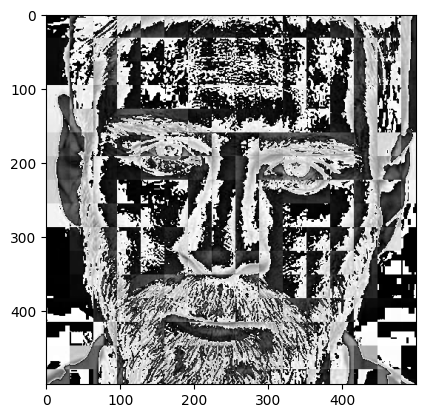

In [16]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray') 

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [35]:
# Assigning the y, which gonna be the name of the celeb. But we can use char but number.

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count  = count + 1
class_dict


# it returns cropped as celeb

{'mbappe': 0, 'messi': 1, 'osimhen': 2, 'ronaldo': 3, 'serena williams': 4}

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [38]:
# X is all the cropped images.
len(X)

159

In [39]:
# size of this image is 4096
# no of pixels in the image
len(X[0])

4096

In [40]:
# reshaping. COnverting to array.

X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(159, 4096)

### Model training
We are using SVM with rbf kernel with heuristic finetuning and Grid search to try out other models.

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [42]:


# Assuming X is your feature data and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.725

In [43]:
len(X_test)

40

In [44]:
# Getting classification report for the prerdicted test
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.75      0.86         8
           2       0.00      0.00      0.00         2
           3       0.90      0.64      0.75        14
           4       0.40      0.50      0.44         4

    accuracy                           0.72        40
   macro avg       0.59      0.58      0.57        40
weighted avg       0.74      0.72      0.71        40



c:\Users\USER-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [45]:
# GridSearch CV is use for hyper parameters tuning
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



In [46]:
# Create a pipeline with SVM, Random Forest Classifier, and Logistic Regression
pipeline = make_pipeline(
    svm.SVC(),
    RandomForestClassifier(),
    LogisticRegression()
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'logisticregression__C': [0.1, 1, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)


In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [48]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_31372\161526656.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\USER-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\USER-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\USER-PC\AppData\Local\Programs

,model,best_score,best_params
0,svm,0.723188,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.487319,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.664493,{'logisticregression__C': 1}


In [49]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
# For hyper tunning parameter, using validating sets
# to get the performance, use X_test
# testing on test set with the best estimator which is log regre

best_estimators['logistic_regression'].score(X_test, y_test)

0.875

In [51]:
best_estimators['svm'].score(X_test, y_test)

0.85

In [52]:
best_clf = best_estimators['svm']

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  1],
       [ 0,  0,  1,  0,  1],
       [ 1,  0,  0, 12,  1],
       [ 1,  0,  0,  1,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

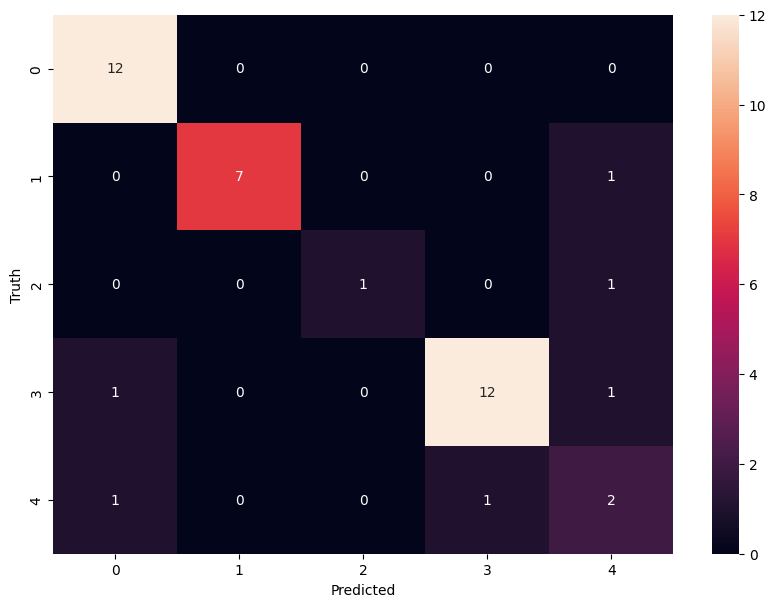

In [54]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:

class_dict

{'mbappe': 0, 'messi': 1, 'osimhen': 2, 'ronaldo': 3, 'serena williams': 4}

### Trying to use TensorFlow

In [64]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)


In [65]:
print([type(data) for data in [X_train, y_train]])


[<class 'numpy.ndarray'>, <class 'numpy.ndarray'>]


In [58]:
sclaer = StandardScaler()
X = sclaer.fit_transform(X)

from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# The snippet defines a neural network model with one input layer, two hidden layers, one output layer,
import tensorflow as tf

inputs = tf.keras.Input(shape=(4096,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 20

history = model.fit(
    X_train, 
    y_train,
    validation_split = 0.2,
    batch_size=batch_size, 
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()] 
)

Epoch 1/20


3/3 [==============================] - 2s 147ms/step - loss: 2.2833 - accuracy: 0.2273 - val_loss: 1.5766 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 2/20
3/3 [==============================] - 0s 30ms/step - loss: 0.4262 - accuracy: 0.9205 - val_loss: 1.3300 - val_accuracy: 0.6087 - lr: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 0.1041 - accuracy: 0.9886 - val_loss: 1.3890 - val_accuracy: 0.5652 - lr: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 1.5097 - val_accuracy: 0.5652 - lr: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 44ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.6256 - val_accuracy: 0.5652 - lr: 0.0010
Epoch 6/20
3/3 [==============================] - 0s 47ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.7230 - val_accuracy: 0.5652 - lr: 0.0010
Epoch 7/20
3/3 [==============================] - 0s 46ms/step - loss: 0.0037 - accur

In [69]:
X_test = np.array(X_test)
y_test = np.array(y_test)


model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.7747 - accuracy: 0.5417


[1.7746825218200684, 0.5416666865348816]

### We are going for svm model

### Save the trained model

In [70]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

#### Save Class Dictionary

In [75]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

## From here, the work of a data scientist is done.
## Handle over the saved model and class name to the engineering team.